# Handwritten Digit Classification with Multi-layer Perceptron
This notebook shows how to use a simple neural network to do image classification. The notebook was written for practice and the original codes were taken from this [tutorial](https://machinelearningmastery.com/handwritten-digit-recognition-using-convolutional-neural-networks-python-keras/).

Read more about Keras [here](https://keras.io/).

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


First we load the MNIST dataset using a function provided by Keras.

Train dataset features shape: (60000, 28, 28)
Train dataset labels shape: (60000,)
Test dataset features shape: (10000, 28, 28)
Test dataset labels shape: (10000,)


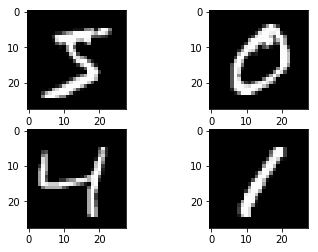

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(f'Train dataset features shape: {train_images.shape}')
print(f'Train dataset labels shape: {train_labels.shape}')
print(f'Test dataset features shape: {test_images.shape}')
print(f'Test dataset labels shape: {test_labels.shape}')

plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
plt.show()

Since we are using a regular perceptron, we need to flatten the input images.

In [3]:
num_pixels = train_images.shape[1] * train_images.shape[2]
train_x = train_images.reshape(train_images.shape[0], num_pixels).astype('float32')
test_x = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

For image classification, it's always a good idea to normalize the data for better convergence and faster training time.

In [4]:
train_x = train_x / 255
test_x = test_x / 255

We will use one-hot encoding for output prediction.

In [5]:
train_y = np_utils.to_categorical(train_labels)
test_y = np_utils.to_categorical(test_labels)
num_classes = test_y.shape[1]

Now, let's define our model. As mentioned before, we're using a multi-layer perceptron for classification. This simple model only consists of one hidden layer.

In [6]:
def classification_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Now that we have the data and the model, we can start the training process.

In [7]:
model = classification_model()
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(test_x, test_y, verbose=0)
print('Error Rate: {0:.2f}%'.format(100 - scores[1] * 100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 6s - loss: 0.2793 - acc: 0.9209 - val_loss: 0.1344 - val_acc: 0.9601
Epoch 2/10
 - 5s - loss: 0.1088 - acc: 0.9693 - val_loss: 0.0984 - val_acc: 0.9703
Epoch 3/10
 - 5s - loss: 0.0705 - acc: 0.9794 - val_loss: 0.0816 - val_acc: 0.9743
Epoch 4/10
 - 5s - loss: 0.0498 - acc: 0.9856 - val_loss: 0.0798 - val_acc: 0.9747
Epoch 5/10
 - 5s - loss: 0.0363 - acc: 0.9895 - val_loss: 0.0710 - val_acc: 0.9778
Epoch 6/10
 - 5s - loss: 0.0260 - acc: 0.9930 - val_loss: 0.0639 - val_acc: 0.9802
Epoch 7/10
 - 5s - loss: 0.0190 - acc: 0.9956 - val_loss: 0.0554 - val_acc: 0.9827
Epoch 8/10
 - 5s - loss: 0.0138 - acc: 0.9971 - val_loss: 0.0622 - val_acc: 0.9807
Epoch 9/10
 - 5s - loss: 0.0101 - acc: 0.9981 - val_loss: 0.0628 - val_acc: 0.9823
Epoch 10/10
 - 5s - loss: 0.0076 - acc: 0.9986 - val_loss: 0.0592 - val_acc: 0.9821
Error Rate: 1.79%


Finally, we can use the trained model to do predictions.

In [8]:
pred_probs = model.predict(test_x)
pred_labels = np.argmax(pred_probs, axis=1)

Let's pick a random image from the test dataset and check its performance.

Predicted label: 2


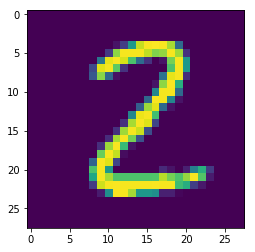

In [9]:
num_test = test_images.shape[0]
rand_index = np.random.randint(num_test)
print(f'Predicted label: {pred_labels[rand_index]}')

plt.imshow(test_images[rand_index])
plt.show()